Logistic regression

IMPORTAR LIBRERIAS

In [1]:
import os, cv2, itertools
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LogisticRegressionCV 
import matplotlib.pyplot as plt 
%matplotlib inline
import pickle

Definimos variable globales

In [4]:
train_dir= "input/train/"
test_dir="input/test/"
ROWS = 64
COLS = 64
CHANNELS = 3

Ahora creo las variables con los path de las direciones de las img

In [5]:
train_images = [train_dir+i for i in os.listdir(train_dir)]
test_images = [test_dir+i for i in os.listdir(test_dir)]

Se lee las imagenes con Cv2

In [6]:
def read_image(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (ROWS, COLS),interpolation=cv2.INTER_CUBIC)

Funcion para recorrer los archivos y prepararlos para el formato de logistic regression

In [7]:
def prep_data(images):
  m = len(images)
  n_x = ROWS*COLS*CHANNELS
  
  X = np.ndarray((n_x,m), dtype=np.uint8)
  y = np.zeros((1,m))
  print("X.shape is {}".format(X.shape))
  
  for i,image_file in enumerate(images) :
    image = read_image(image_file)
    X[:,i] = np.squeeze(image.reshape((n_x,1)))
    if 'dog' in image_file.lower() :
      y[0,i] = 1
    elif 'cat' in image_file.lower() :
      y[0,i] = 0
    else : # for test data
      y[0,i] = image_file.split('/')[-1].split('.')[0]
      
    if i%5000 == 0 :
      print("Proceed {} of {}".format(i, m))
    
  return X,y

llamamos a la funcion para preparar la data

In [8]:
X_train, y_train = prep_data(train_images)
X_test, test_idx = prep_data(test_images)

X.shape is (12288, 25000)
Proceed 0 of 25000
Proceed 5000 of 25000
Proceed 10000 of 25000
Proceed 15000 of 25000
Proceed 20000 of 25000
X.shape is (12288, 12500)
Proceed 0 of 12500
Proceed 5000 of 12500
Proceed 10000 of 12500


se definen las clases

In [9]:
classes = {0: 'cats',
           1: 'dogs'}

toma el argumento y muestra la imagen

In [10]:
def show_images(X, y, idx) :
  image = X[idx]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize=(4,2))
  plt.imshow(image)
  plt.title("This is a {}".format(classes[y[idx,0]]))
  plt.show()

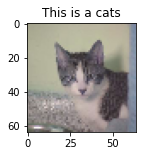

In [11]:
show_images(X_train.T, y_train.T, 2)

Entrenamos y se pone ravel para que entregue una array

In [12]:
model=LogisticRegressionCV()

In [13]:
X_train_lr, y_train_lr = X_train.T, y_train.T.ravel()

In [ ]:
model.fit(X_train_lr, y_train_lr)

/home/joyce/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
filename = 'LogRegmodel.sav'
pickle.dump(model, open(filename, 'wb'))

In [17]:
print("Model accuracy: {:.2f}%".format(model.score(X_train_lr, y_train_lr)*100))

Model accuracy: 73.19%


Entrenamos todos los datos

In [19]:
def show_image_prediction(X, idx, model) :
  image = X[idx].reshape(1,-1)
  image_class = classes[model.predict(image).item()]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize = (4,2))
  plt.imshow(image)
  plt.title("Test {} : I think this is {}".format(idx, image_class))
  plt.show()

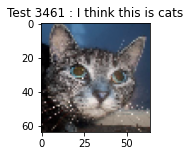

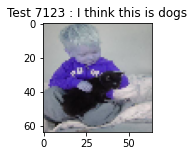

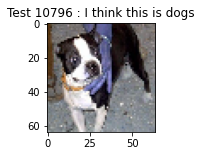

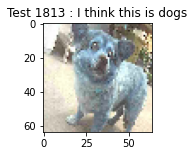

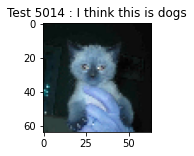

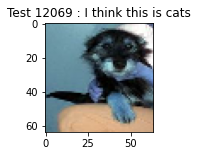

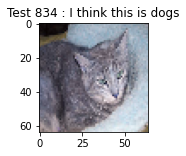

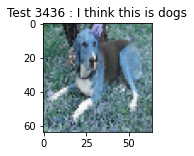

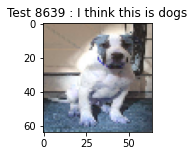

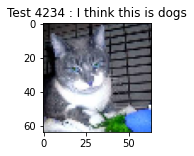

In [20]:
X_test_lr, test_idx = X_test.T, test_idx.T

for i in np.random.randint(0, len(X_test_lr), 10) :
  show_image_prediction(X_test_lr, i, model)